In [5]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os

In [6]:
num_classes = 6
img_rows, img_cols = 224, 224
batch_size = 32

train_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\training'
validation_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\validation'
testing_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\testing'

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        testing_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 3384 images belonging to 6 classes.
Found 584 images belonging to 6 classes.
Found 139 images belonging to 6 classes.


In [8]:
model = Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(75, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    Dense(6, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [9]:
opt = SGD(lr=1e-4)
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                          min_delta=0.01,
                                          patience=6,
                                          verbose=1,
                                          mode='auto',
                                          restore_best_weights=True)

In [11]:
history = model.fit(x=train_generator, 
                 validation_data=validation_generator,
                 epochs=200,
                 verbose=1,
                 callbacks=[callback])

Epoch 1/200
106/106 [==============================] - 410s 4s/step - loss: 2.7053 - accuracy: 0.1950 - val_loss: 1.9569 - val_accuracy: 0.1644
Epoch 2/200
106/106 [==============================] - 382s 4s/step - loss: 2.0044 - accuracy: 0.2293 - val_loss: 2.3177 - val_accuracy: 0.1644
Epoch 3/200
106/106 [==============================] - 381s 4s/step - loss: 1.8419 - accuracy: 0.2642 - val_loss: 2.2035 - val_accuracy: 0.1644
Epoch 4/200
106/106 [==============================] - 392s 4s/step - loss: 1.7599 - accuracy: 0.2843 - val_loss: 1.8794 - val_accuracy: 0.2038
Epoch 5/200
106/106 [==============================] - 464s 4s/step - loss: 1.7026 - accuracy: 0.3014 - val_loss: 1.8315 - val_accuracy: 0.2175
Epoch 6/200
106/106 [==============================] - 460s 4s/step - loss: 1.6458 - accuracy: 0.3254 - val_loss: 1.6844 - val_accuracy: 0.2757
Epoch 7/200
106/106 [==============================] - 425s 4s/step - loss: 1.6244 - accuracy: 0.3372 - val_loss: 1.6528 - val_accuracy:

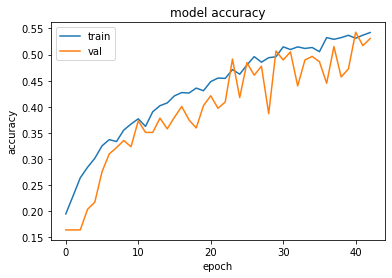

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

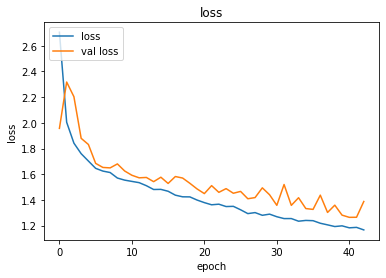

In [13]:
acc = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import pandas as pd

In [15]:
# ambil label true kelas di data training
y_true = test_generator.classes

# ambil label hasil prediksi (index maksimum, secara kolom)
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# performa model di 
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65        22
           1       0.37      0.30      0.33        23
           2       0.39      0.92      0.55        26
           3       1.00      0.04      0.08        24
           4       0.76      0.83      0.79        23
           5       1.00      0.10      0.17        21

    accuracy                           0.50       139
   macro avg       0.68      0.49      0.43       139
weighted avg       0.67      0.50      0.43       139



In [16]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename_axis('Actual').rename_axis('Predicted', axis=1)
cm

Predicted,0,1,2,3,4,5
Actual,,,,,,
0,17,2,0,0,3,0
1,2,7,14,0,0,0
2,0,2,24,0,0,0
3,1,1,20,1,1,0
4,3,0,1,0,19,0
5,7,7,3,0,2,2


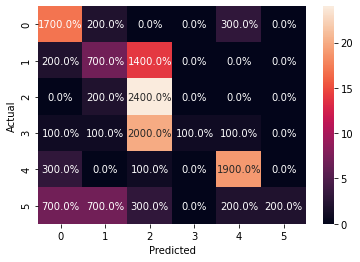

In [17]:
sns.heatmap(cm, annot=True, fmt=".1%")